In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pimaha/diabetes.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [3]:
DF=pd.read_csv('/kaggle/input/pimaha/diabetes.csv')

In [4]:
DF

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
DF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
DF['Glucose'] = DF['Glucose'].replace(0, DF['Glucose'].mean())
DF['BloodPressure'] = DF['BloodPressure'].replace(0, DF['BloodPressure'].mean())
DF['SkinThickness'] = DF['SkinThickness'].replace(0, DF['SkinThickness'].mean())
DF['Insulin'] = DF['Insulin'].replace(0, DF['Insulin'].mean())
DF['BMI'] = DF['BMI'].replace(0, DF['BMI'].mean())

In [7]:
#Removing outliers 
Q1 = DF.quantile(0.25)
Q3 = DF.quantile(0.75)
IQR = Q3 - Q1

DF = DF[~((DF < (Q1 - 1.5 * IQR)) |(DF > (Q3 + 1.5 * IQR))).any(axis=1)]

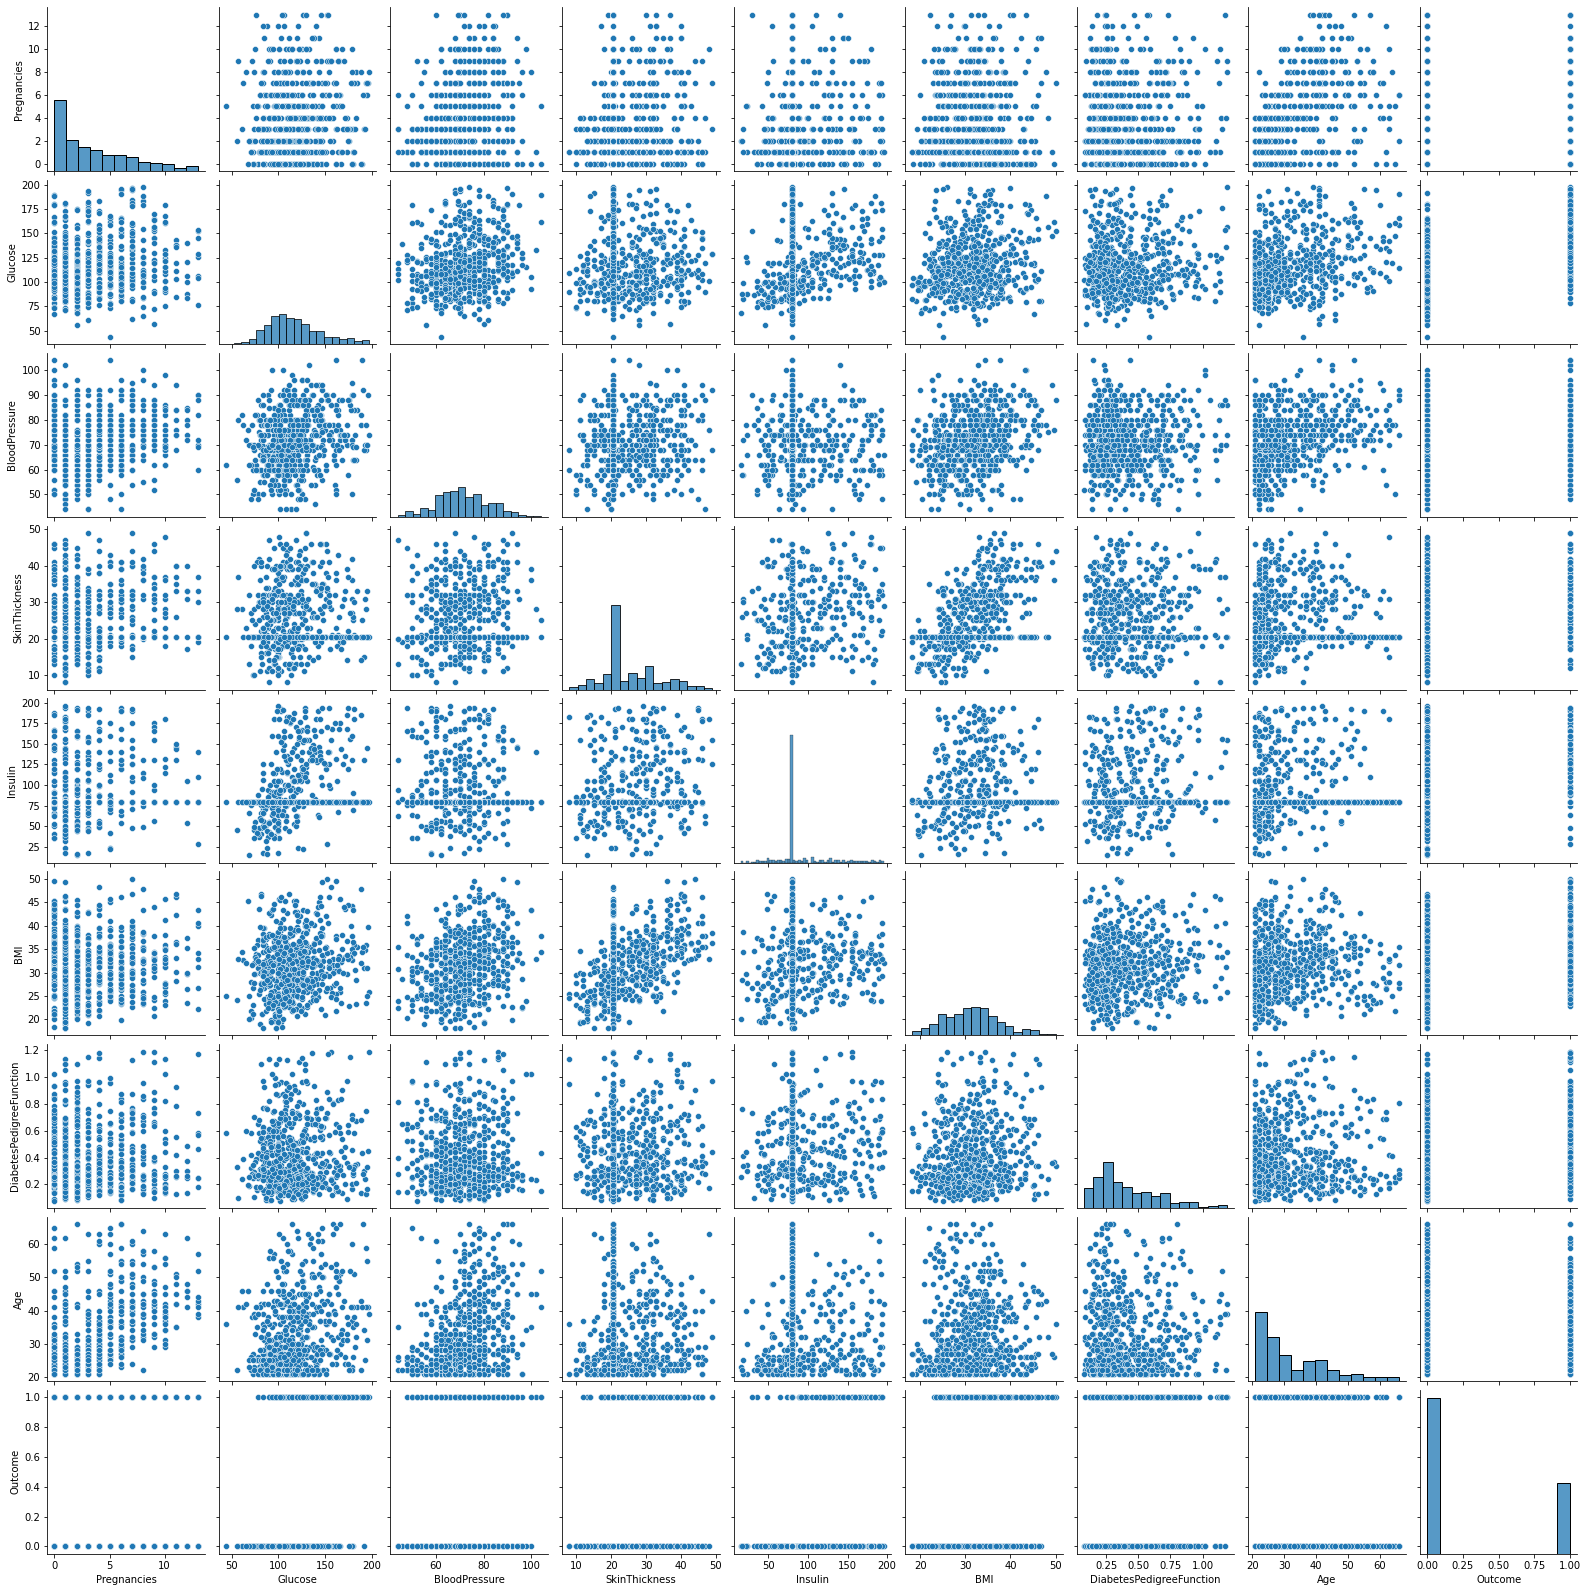

In [8]:
sns.pairplot(DF)

<AxesSubplot:>

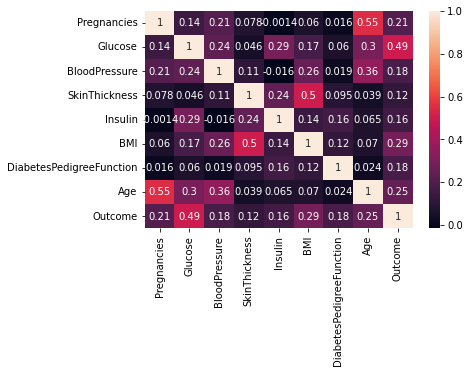

In [9]:
sns.heatmap(DF.corr(), annot=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

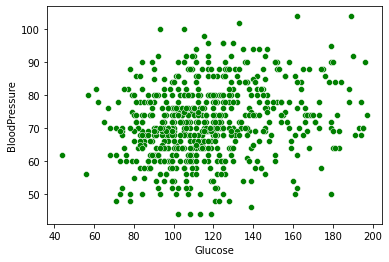

In [10]:
sns.scatterplot('Glucose', 'BloodPressure', data=DF, color='green')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Insulin', ylabel='BMI'>

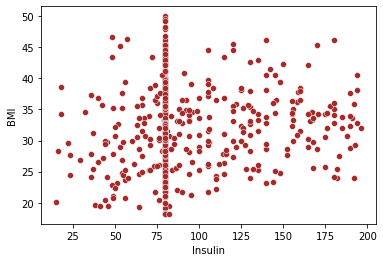

In [11]:
sns.scatterplot('Insulin', 'BMI', data=DF, color='brown')

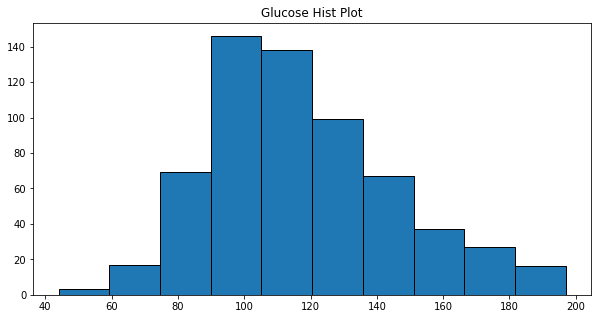

In [12]:
plt.figure(figsize=(10,5))
plt.hist('Glucose', data=DF, edgecolor='k')
plt.title('Glucose Hist Plot')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SkinThickness', ylabel='Insulin'>

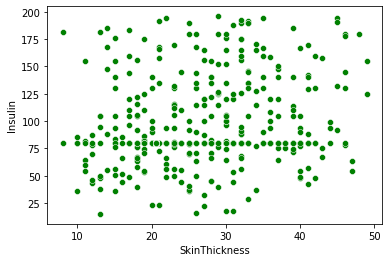

In [13]:
sns.scatterplot('SkinThickness', 'Insulin', data=DF, color='green')

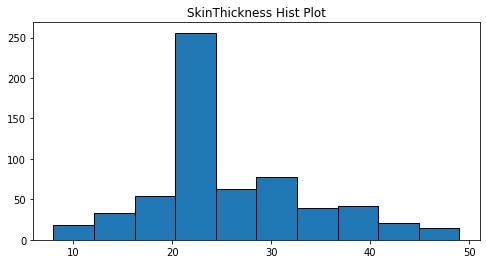

In [14]:
plt.figure(figsize=(8,4))
plt.hist('SkinThickness', data=DF, edgecolor='k')
plt.title('SkinThickness Hist Plot')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Outcome', ylabel='count'>

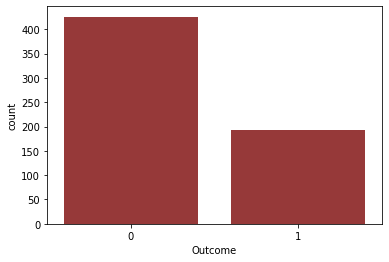

In [15]:
sns.countplot(DF['Outcome'], color='brown')

In [16]:
value=DF['Outcome'].value_counts()
value

0    426
1    193
Name: Outcome, dtype: int64

In [17]:
DF.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
X=DF[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y=DF['Outcome']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
Logreg=LogisticRegression()
Logreg.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [23]:
Logreg.score(X_test, y_test)

0.8146341463414634

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
prediction=Logreg.predict(X_test)

In [26]:
cm=confusion_matrix(y_test, prediction)

In [27]:
cm

array([[125,  17],
       [ 21,  42]])

<AxesSubplot:>

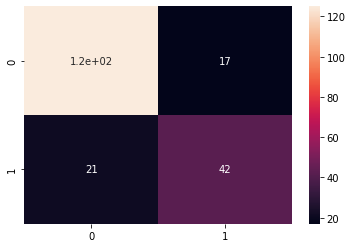

In [28]:
sns.heatmap(cm, annot=True)

In [29]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       142
           1       0.71      0.67      0.69        63

    accuracy                           0.81       205
   macro avg       0.78      0.77      0.78       205
weighted avg       0.81      0.81      0.81       205

